<a href="https://colab.research.google.com/github/DaverArenas/MachineLearning_Introduction/blob/main/prueba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datalytics Colombia S.A.S

La siguiente es una prueba técnica, que tiene como objetivo mostrar sus habilidades para comprender, extraer patrones y generar valor a partir de los datos. Por favor crear una copia del notebook con el nombre seguido del apellido, ejemplo: **JuanGuillermo.ipnb** y sobre ella desarollar la solución.

La prueba tiene cuatro componentes, los cuales son:

1. Análisis exploratorio de datos.
2. Construcción de un modelo analítico (Prototipado rápido).
3. Evaluación del modelo y pasos a seguir.
4. Conclusiones

Para el desarrollo de la prueba siéntase libre de utilizar el lenguaje de programación con el cuál se sienta más cómodo.

## Entendimiento de los datos

En la prueba vas a trabajar con el conjunto de datos Churn-Modeling. Este conjunto de datos contiene detalles de los clientes de un banco y la variable objetivo es una variable binaria que refleja el hecho de si el cliente dejó el banco (cerró su cuenta) o si continúa siendo un cliente. 

Las características capturan información sociodemográfica del cliente, información de productos financieros, el comportamiento y balance de su cuenta. Las características son las siguientes:

* **CustomerId**: Id único para identificar el cliente.
* **Surname**: Apellido del cliente.
* **CreditScore**: Puntaje de crédito del cliente.
* **Geography**: País al que pertenece el cliente.
* **Gender**: Genero.
* **Age**: Edad.
* **Tenure**: Número de años que el cliente ha estado en el banco.
* **Balance**: Saldo bancario del cliente.
* **NumOfProducts**: Número de productos bancarios que utiliza el cliente.
* **HasCrCard**: Si el cliente tiene tarjeta de crédito con el banco.
* **IsActiveMember**: Si el cliente es miembro activo del banco o no.
* **EstimatedSalary**: Salario estimado en dólares.
* **Exited**: 1-Si el cliente cerró la cuenta con el banco; 0-Si el cliente es retenido. 

## Actividades a realizar

1. Identifique las variables (características) relevantes para la predicción.
2. Justifique sus hallazgos, y el modelo que usó o usaría para la predicción de otros clientes que queremos determinar si cerrarán su cuenta con el fin de definir estrategias para retenerlos.


## 1. Análisis exploratorio de datos

El análisis exploratorio de datos (EDA) es un paso previo a la hora de comprender los datos con los que se va a trabajar. El objetivo de este análisis es explorar, describir, resumir y visualizar la naturaleza de los datos recogidos en las variables aleatorias de interés, mediante la aplicación de técnicas simples de resumen de datos y métodos gráficos.

Realice el análisis exploratorio e indique los hallazgos o conclusiones al final de esta sección.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Importamos las librerias

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [3]:
df = pd.read_csv('/content/drive/MyDrive/pruebaTecnicaCrisData/churn-modeling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0


#2. Análisis Exploratorio de datos

In [36]:
#Columnas en el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        9980 non-null   object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  9988 non-null   float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.8+ KB


In [16]:
#Medidas Estadisticas
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9988.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100066.908601,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57519.993379,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,50910.677500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100185.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


In [6]:
#Revisamos correlación entre las variables
corr = df.corr()
corr

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,0.014803,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001633,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007210,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007827,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012520,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014481,-0.047820
EstimatedSalary,0.014803,-0.001633,-0.007210,0.007827,0.012520,0.014481,1.000000,0.012389
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,0.012389,1.000000


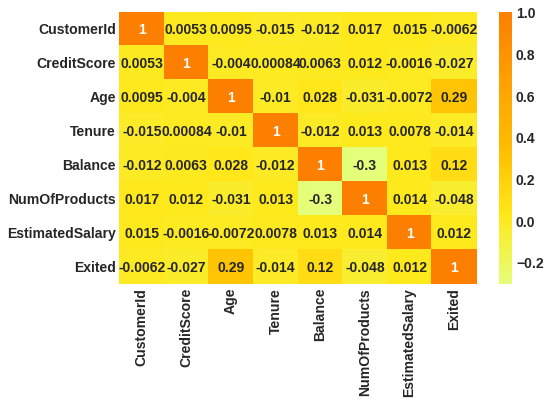

In [7]:
#Correlación entre variables
sns.heatmap(corr, cmap='Wistia', annot=True)

In [9]:
#Verificamos el tipo de dato de las diferentes columnas del dataset
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
#Creamos una lista con las variables categoricas para posteriormente codificar las variables categoricas
categoricas = [col for col in df.columns if df[col].dtypes == 'object']
categoricas

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [12]:
#Creamos una lista con las variables numericas
numericas = [col for col in df.columns if df[col].dtypes != 'object']
numericas

['CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Exited']

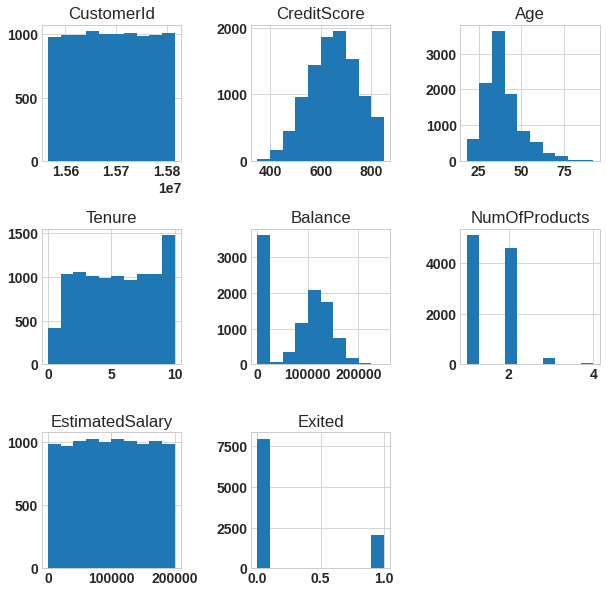

In [13]:
df.hist(column=numericas, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

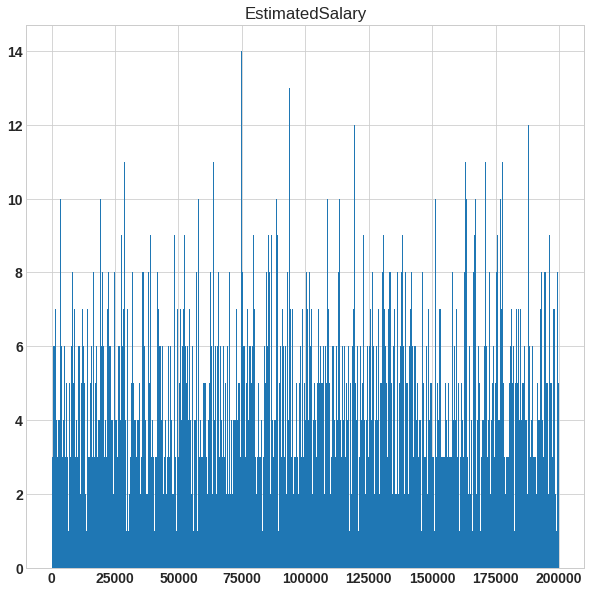

In [23]:
df.hist(column='EstimatedSalary', figsize=(10,10), bins=2000)
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

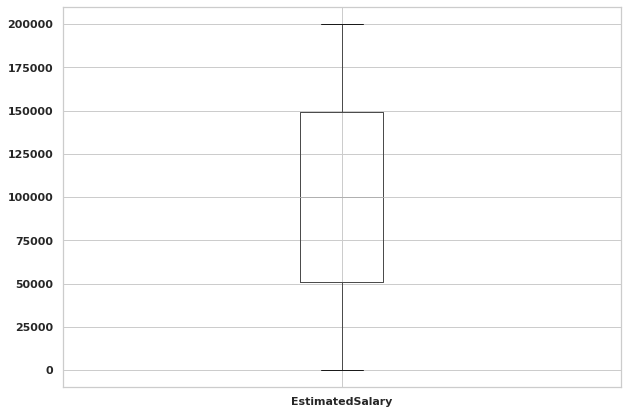

In [35]:
#CAJA DE BIGOTES
plt.figure(figsize=(10,7))
boxplot = df.boxplot(column=['EstimatedSalary'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


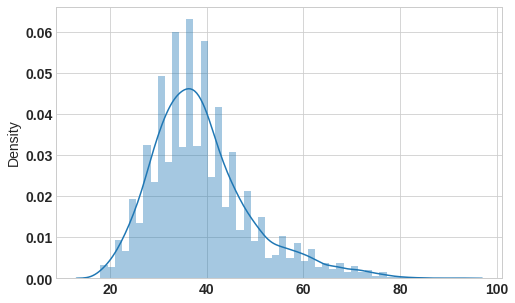

In [5]:
sns.distplot(x=df['Age'])

In [37]:
#Verificamos los datos nulos
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography          20
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary    12
Exited              0
dtype: int64

In [39]:
#Porcentaje de datos nulos en la Columna EstimatedSalary
for col in numericas:
  if df[col].isnull().mean() > 0:
    print(col, round(100*(df[col].isnull().sum())/df.shape[0], 4))

EstimatedSalary 0.12


In [41]:
#Imputamos los datos nulos con la media de los datos de la columna
for col in numericas:
  col_median = df[col].mean()
  df[col].fillna(col_median, inplace=True)

In [42]:
#Verificamos los datos nulos nuevamente para válidar que no existan nulos en la columna EstimatedSalary
df.isnull().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography          20
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [43]:
#Porcentaje de datos nulos en la Columna Geography
for col in categoricas:
  if df[col].isnull().mean() > 0:
    print(col, round(100*(df[col].isnull().sum())/df.shape[0], 4))

Geography 0.2


In [44]:
#Imputamos los datos nulos con la moda de los datos de la columna geografia
for col in categoricas:
  col_mode = df[col].mode()[0]
  df[col] = df[col].fillna(col_mode)

In [45]:
#Verificamos los datos nulos nuevamente para válidar que no existan nulos en la columna Geografia
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [51]:
#Separamos el dataset para el modelo de regresión lineal

from sklearn.model_selection import train_test_split

#Asignamos a la variable X el dataset sin las siguientes columnas
X = df.drop(['Exited','CustomerId','Surname'], axis=1)


#Y es la variable que queremos predecir
y = df['Exited']

In [52]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57
3,699,France,Female,39,1,0.00,2,No,No,93826.63
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,Yes,No,96270.64
9996,516,France,Male,35,10,57369.61,1,Yes,Yes,101699.77
9997,709,France,Female,36,7,0.00,1,No,Yes,42085.58
9998,772,Germany,Male,42,3,75075.31,2,Yes,No,92888.52


In [55]:
#Creamos una lista con las variables categoricas para posteriormente codificar las variables categoricas
categoricas2 = [col for col in X.columns if df[col].dtypes == 'object']
categoricas2

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [61]:
data_dummy = pd.get_dummies(data=X, columns=categoricas2, drop_first=True, dtype='int8')

In [62]:
data_dummy

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42,2,0.00,1,101348.88,0,0,0,1,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,0,0,0,1,0
3,699,39,1,0.00,2,93826.63,0,0,0,0,0
4,850,43,2,125510.82,1,79084.10,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,0,0,1,1,0
9996,516,35,10,57369.61,1,101699.77,0,0,1,1,1
9997,709,36,7,0.00,1,42085.58,0,0,0,0,1
9998,772,42,3,75075.31,2,92888.52,1,0,1,1,0


In [63]:
X_train, X_test, y_train, y_test = train_test_split(data_dummy, y, test_size=0.2, random_state=2)

In [64]:
from sklearn.linear_model import LogisticRegression

regresor_log = LogisticRegression(solver='liblinear',random_state=2)

regresor_log.fit(X_train, y_train)

LogisticRegression(random_state=2, solver='liblinear')

In [65]:
y_pred = regresor_log.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix

y = confusion_matrix(y_test, y_pred)

In [67]:
(y[0][0]+y[1][0])/(y[0][0]+y[0][1]+y[1][0]+y[1][1])

0.977

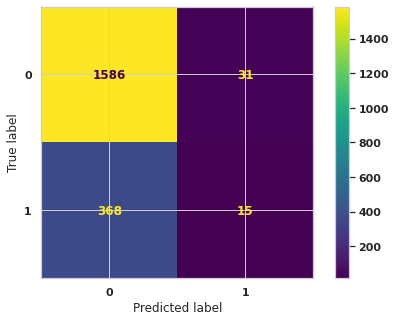

In [73]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(regresor_log, X_test, y_test)  
plt.show()

In [74]:
#Función de ayuda para calcular metricas de un modelo
def funcion_ayuda(y_corr, y_pred):
  cm = confusion_matrix(y_corr, y_pred)
  sns.heatmap(cm, annot=True, fmt='.3f', square=True)
  acc = accuracy_score(y_corr, y_pred)
  plt.title(f'Accuracy: {round(acc,3)}')
  clasificacion_rep = pd.DataFrame(classification_report(y_corr, y_pred, output_dict=True))
  display(clasificacion_rep.round(2))

,0,1,accuracy,macro avg,weighted avg
precision,0.81,0.33,0.8,0.57,0.72
recall,0.98,0.04,0.8,0.51,0.80
f1-score,0.89,0.07,0.8,0.48,0.73
support,1617.00,383.00,0.8,2000.00,2000.00


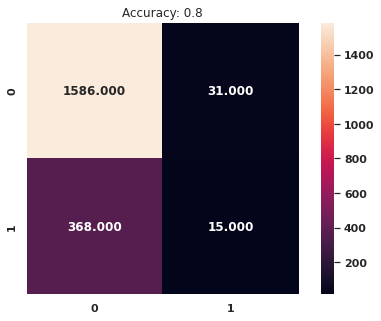

In [75]:
#Usando la función de ayuda anterior calculamos las metricas del modelo
funcion_ayuda(y_test, y_pred)

In [68]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Construcción de modelos

Como no sabemos que algoritmos serán buenos para este problema o que configuraciones se deben usar, se pueden hacer gráficas para ver que clases la separación de las clases. 

Se van a evaluar 5 modelos 
- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).

También te dejo el  [cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
 de scikit-learn como herramienta base para que selecciones los modelos a utilizar.

In [69]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [71]:
scoring = 'accuracy'

In [72]:
import warnings
warnings.filterwarnings("ignore")

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.787625 (0.018298)
LDA: 0.806250 (0.017589)
KNN: 0.757375 (0.013032)
NB: 0.782375 (0.018066)
SVM: 0.793250 (0.014122)


In [ ]:
##Convertimos las siguientes variables categoricas en variables numericas usando el método Map
X['Education'] = X_R['Education'].map({'Bachelors': 0 , 'Masters': 1, 'PHD': 2})
X['City'] = X_R['City'].map({'Bangalore': 0 , 'New Delhi': 1, 'Pune': 2})
X['Gender'] = X_R['Gender'].map({'Female': 0 , 'Male': 1})
X['EverBenched'] = X_R['EverBenched'].map({'No': 0 , 'Yes': 1})
X

In [ ]:
df.info()
# se hace un analisis de cada columna, el tipo de dato y si tiene valuros nulos

'''se se tiene un total de 10000 muestras y se encuentra que la columna geography tiene 20 filas con valores nulos, 
de igual manera la columna EstimatedSalary con 12 filas con valores nulos  '''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        9980 non-null   object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  object 
 10  IsActiveMember   10000 non-null  object 
 11  EstimatedSalary  9988 non-null   float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1015.8+ KB


In [ ]:
# total valores nulos=32
df.isnull().sum().sum()

32

In [ ]:
#analizando cuales son las filas con los valores nulos
df[df.Geography.isnull() | df.EstimatedSalary.isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,Yes,No,NaN,1
332,15702669,Faulkner,663,Germany,Male,44,2,117028.60,2,No,Yes,NaN,0
439,15690134,Hughes,464,NaN,Female,42,3,85679.25,1,Yes,Yes,164104.74,0
445,15803406,Ross,748,France,Female,26,1,77780.29,1,No,Yes,NaN,0
576,15761986,Obialo,439,NaN,Female,32,3,138901.61,1,Yes,No,75685.97,0
582,15576352,Revell,586,NaN,Female,57,3,0.00,2,No,Yes,6057.81,0
1731,15721730,Amechi,601,NaN,Female,44,4,0.00,2,Yes,No,58561.31,0
2364,15796343,Bazhenov,707,France,Female,31,2,82787.93,2,No,No,NaN,0
2656,15713267,Zimmer,779,Spain,Female,34,5,0.00,2,No,Yes,NaN,0
2750,15767474,Lorenzo,481,NaN,Female,57,9,0.00,3,Yes,Yes,169719.35,1


In [ ]:
# se hace una analisis de las variables categoricas
df.Geography.unique()
df.Gender.unique()
df.IsActiveMember.unique()
df.Exited.unique()

array([1, 0])

## 2. Construcción del modelo analítico

En esta sección el objetivo es que construya un prototipo rápido de un modelo analítico y lo guarde. Es importante que nos cuente porque eligió este modelo, es decir, que vio en los datos para creer que un modelo como este podría funcionar bien. Adicional, suponga que le va a presentar esté modelo a un usuario que le parece importante tener un modelo que sea preciso, pero que también cuyos resultados puedan ser interpretables de alguna manera.

* ¿Es su modelo interpretable?
* Si no es interpretable ¿Hay alguna forma de hacerlo interpretable?

para la construcion de modelo tendermos encuenta las variables mas significativas 

## 3. Evaluación del modelo y pasos a seguir

En esta sección cuentenos como evaluaría el modelo, y por qué eligió estás métricas para la evaluación. Posterior a eso, si tuviera más tiempo:

* ¿Qué le gustaría realizar para complementar el análisis que ya ha hecho?
* ¿Cómo pondría este modelo en producción? Suponga que envían otros clientes nuevos cada **semana** y que este insumo es un archivo **.csv**.
* ¿Cómo evaluaría que el modelo funcione bien después de que esté en producción?

## 4. Conclusiones

Describa los resultados obtenidos de su modelo y defina posibles recomendaciones o sugerencias que se puedan derivar de éstos resultados.